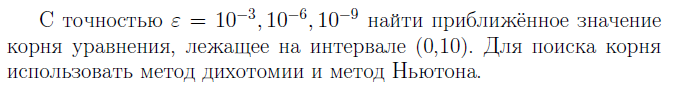

[Метод дихотомии](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B1%D0%B8%D1%81%D0%B5%D0%BA%D1%86%D0%B8%D0%B8)

[Метод Ньютона](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0)

Вывести результат в формате подобном следующему:
```
bisection:
eps = 0.001,	x* = 0.1214599609375,	f(x*) = -0.0005786790026332533,	iters=13
eps = 1e-06,	x* = 0.12159645557403564,	f(x*) = 6.979439459708914e-07,	iters=24
eps = 1e-09,	x* = 0.12159629113739356,	f(x*) = -6.781464279015381e-12,	iters=36
newton:
eps = 0.001,	x* = 0.1215813397914072,	f(x*) = -6.346125553152726e-05,	iters=5
eps = 1e-06,	x* = 0.12159633989416463,	f(x*) = 2.0694116326103185e-07,	iters=7
eps = 1e-09,	x* = 0.12159629097976861,	f(x*) = -6.758200665757386e-10,	iters=9

```

`eps` -- заданная точность

`x*` -- вычисленный корень

`f(x*)` -- значение функции в корне (увидеть, что оно по модулю меньше `eps`)

`iters` -- количество потребовавшихся итераций алгоритма для получения заданной точности

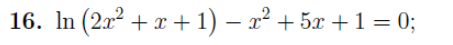

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

eps = [1e-03, 1e-06, 1e-09]

def f(x):
    return np.log(2*x**2 + x +1) - x**2 + 5*x + 1

def f_derivative(x):
    return (4*x + 1)/(2*x**2 + x + 1) - 2*x + 5

print('Bisection:')
start_time = time.time()
iters = 0
a = 0
b = 10
c = 0
for i in range(3):
    while abs(f(c)) > eps[i]:
        c = (a+b)/2
        iters += 1
        if (f(a)*f(c)<0):
           b = c
        else:
           a = c
    print(f'eps = {eps[i]}', f'x* = {c:.15f}', f'|f(x*)| = {abs(f(c)):.17e}', f'iters = {iters}', sep=',    ')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Время выполнения: {elapsed_time:.4f} секунд", end='\n\n')



print('Newton:')
print('Начальное приближение: x0 = 5')
start_time = time.time()
iters = 0
c = 5
for i in range(3):
    while abs(f(c)) > eps[i]:
        iters += 1
        c = c - f(c)/f_derivative(c)
    print(f'eps = {eps[i]}', f'x* = {c}', f'|f(x*)| = {abs(f(c)):.17e}', f'iters = {iters}', sep=',    ')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Bisection:
eps = 0.001,    x* = 5.904235839843750,    |f(x*)| = 9.17904549453396612e-05,    iters = 15
eps = 1e-06,    x* = 5.904249846935272,    |f(x*)| = 9.23403163710645458e-07,    iters = 25
eps = 1e-09,    x* = 5.904249989253003,    |f(x*)| = 1.55001345092387055e-10,    iters = 35
Время выполнения: 0.0074 секунд

Newton:
Начальное приближение: x0 = 5
eps = 0.001,    x* = 5.904253877644499,    |f(x*)| = 2.52247595575738615e-05,    iters = 3
eps = 1e-06,    x* = 5.904249989279286,    |f(x*)| = 1.55075952079641866e-11,    iters = 4
eps = 1e-09,    x* = 5.904249989279286,    |f(x*)| = 1.55075952079641866e-11,    iters = 4
Время выполнения: 0.0115 секунд
